In [1]:
%pylab inline
from scipy.special import gamma

Populating the interactive namespace from numpy and matplotlib


Pearson's $\Xi^2$ test:

Assumptions:

1. The uncertainties in one direction $x$ are more smaller that the uncertainties in the other direction $y$. 

2. All uncerteinties in $y$ are Gaussian

3. All data points are uncorrelated. 


model $y=y(x;\vec{m})$.

Goal: what is the model that agrees more with the data.

Because assumption 2 we have that the likelihood is:

$p_i = \dfrac{1}{\sqrt{2\pi \sigma_i ^2}e^{-\frac{y(x_i;m)-y_i}{2\sigma_i^2}}}$

Because assumption 3:

 $P = \prod_{i=1} \left( \dfrac{1}{\sqrt{2\pi \sigma_i ^2}}e^{-\frac{[y(x_i;m)-y_i]^2}{2\sigma_i^2}} \right)$
 
  $P = \dfrac{1}{\sqrt{2\pi \sigma_i ^2}} \prod_{i=1} e^{-\frac{[y(x_i;m)-y_i]^2}{2\sigma_i^2}} \right)$
  
  $P =(\dfrac{1}{\sqrt{2\pi \sigma_i ^2}} ) e^{-\frac{1}{2}\sum \frac{[y(x_i;m)-y_i]^2}{\sigma_i^2}}$

# Linear model:

$y = a + bx$

$\xi^2 = \sum \dfrac{[y_i - (a+bx)]^2}{\sigma_i^2}$

We minimize this when ($\dfrac{\partial x^2}{\partial a} = 0 = \sum_i \dfrac{[y_1 - a - bx_1]}{\sigma_i^2}) = 0 $


$a = \dfrac{S_{xx} S_y - S_x S_{xy}}{\Delta}$

$b = \dfrac{S S_{xy} - S_x S_{y}}{\Delta}$


This is very good, but no body uses this any more due to cancellatios if errors.
 
$t_i = \dfrac{1}{\sigma_i^2} \left[ x_i - \dfrac{S_x}{S}\right]$

$S_{tt} = \sum t_i^2$

$b = \dfrac{1}{S_{tt}} \sum \dfrac{t_i y_i}{\sigma_i}$

$a = \dfrac{S_y - Sxb}{S}$

use this equations.




In [2]:
# Example: 

#10 data points:

def y(x):
    return 1 + 2*x

In [3]:
N_points = 10

def data(N_points):
    x1 = linspace(1.0, 4.0, N_points)
    y1 = y(x1)
    dy = np.zeros(N_points)
    for i in range(N_points):
        dy[i] = np.random.normal(y1[i], 0.1, 1)
    return x1, dy


NameError: name 'dy' is not defined

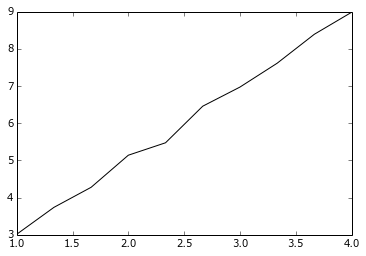

In [5]:
x1, dy = data(10)
plot(x1, y1, c='k')
scatter(x1, dy, c='r')

In [184]:
def S(sigma):
    return sum(1.0/sigma**2.0)

def Sy(sigma, y):
    return sum(y/sigma**2.0)

def Sx(sigma, x):
    return sum(x/sigma**2.0)

def ti(sigma, x):
    S_x = Sx(sigma, x)
    SS = S(sigma)
    return (x - S_x/SS)/sigma 

def Stt(sigma, x):
    tt = ti(sigma, x)
    return sum(tt**2.0)

def b(sigma, x, y):
    tt = ti(sigma, x)
    S_tt = Stt(sigma, x)
    return sum(tt*y/sigma)/S_tt
    
def a(sigma, x, y):
    S_x = Sx(sigma, x)
    S_y = Sy(sigma, y)
    S_tt = Stt(sigma, x)
    t = ti(sigma, x)
    SS = S(sigma)
    bb = b(sigma, x, y)
    return (S_y - S_x*bb)/SS

def xisquare(sigma, x, y, a, b):
    return sum((y-a-b*x)**2/sigma**2)

In [197]:
N_points = 1000
B = np.zeros(N_points)
A = np.zeros(N_points)
xi2 = np.zeros(N_points)

for i in range(1000):
    x1, dy = data(10)
    sigma_1 = np.zeros(10) + 0.1
    B[i] = b(sigma_1, x1, dy)
    A[i] = a(sigma_1, x1, dy)
    xi2[i] = xisquare(sigma_1, x1, dy, A[i], B[i])

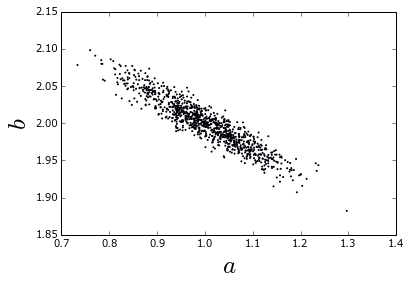

In [198]:
scatter(A, B, s=1)
xlabel('$a$', fontsize=25)
ylabel('$b$', fontsize=25)

In [199]:
def Sxx(sigma, x):
    return sum(x**2/sigma**2)

def Delta(sigma, x):
    SS = S(sigma)
    S_xx = Sxx(sigma, x)
    S_x = Sx(sigma, x)
    return SS * S_xx  - S_x**2 
    
def sigma_a(sigma, x):
    S_xx = Sxx(sigma, x)
    D = Delta(sigma, x) 
    return S_xx/D

def sigma_b(sigma, x):
    SS = S(sigma)
    D = Delta(sigma, x)
    return SS / D
    

In [200]:
s_a = sigma_a(sigma_1, x1)
s_b = sigma_b(sigma_1, x1)
print s_a, s_b

0.00781818181818 0.00109090909091


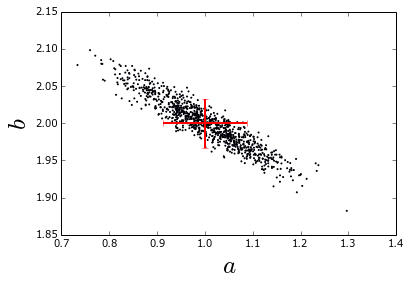

In [201]:
scatter(A, B, s=1)
errorbar(1.0, 2, xerr=np.sqrt(s_a), yerr=np.sqrt(s_b), lw=2, c='r')
xlabel('$a$', fontsize=25)
ylabel('$b$', fontsize=25)

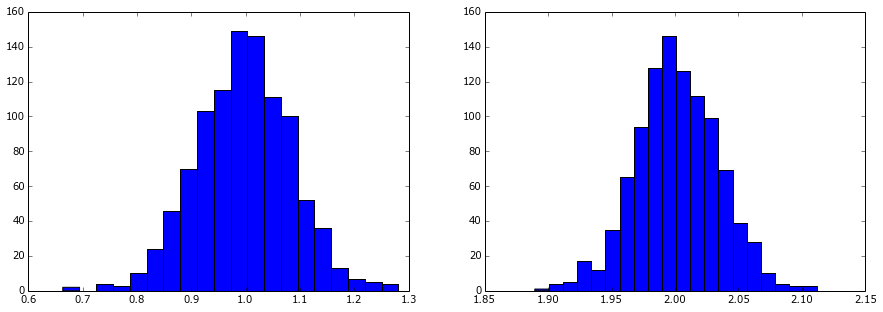

In [180]:
figure(figsize=(15, 5))
subplot(1, 2, 1)
ha = hist(A, bins=20)
subplot(1, 2, 2)
hb = hist(B, bins=20)


In [191]:
def xi2dist(xi, k):
    pxi = 1/(2**(k/2.0) * gamma(k/2.0)) * xi**(k/2.0-1.0)*exp(-xi/2.0)
    return pxi

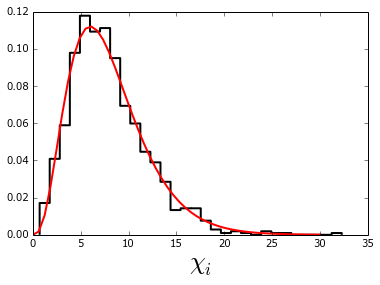

In [211]:
h3 = hist(xi2, bins=30, histtype='step', lw=2, color='k', normed=True)
xi_t = linspace(0, 30)
xi2_teo = xi2dist(xi_t, 8.0)
plot(xi_t, xi2_teo, lw=2.0, c='r')
xlabel(r'$\chi_i$', fontsize=25)